In [1]:
import sys
from pathlib import Path
FMASK_PATH = Path("fmask")
sys.path.append(str(FMASK_PATH))
sys.path.append(str(FMASK_PATH.joinpath("src")))

import os
import numpy as np
import utils

In [2]:
from satellite import Landsat
bands = [
    "blue",
    "green",
    "red",
    "nir",
    "swir1",
    "swir2",
    "tirs1",
    "cirrus",
    "hot",
    "whiteness",
    "ndvi",
    "ndsi",
    "ndbi",
    "dem",
    "swo",
]

def load_image():
    scene_dir = "cloud-data/HI/LC08_L1TP_063047_20251116_20251116_02_RT"
    image = Landsat(scene_dir)
    image.load_data(bands)

    return image

In [3]:
def display_image(bands=None, title=None, percentiles=None, path=None, min_range=None) -> None:
    """
    Standalone display for composite of bands.
    
    Sourced from Fmask class.
    """
    image = load_image()
    
    if bands is None:
        bands = ["red", "green", "blue"]
    if title is None:
        title = f"Color image ({bands[0]}, {bands[1]}, {bands[2]})"
    if percentiles is None:
        percentiles = [2, 98]
    rgb, r_range, b_range, g_range = utils.composite_rgb(
        image.data.get(bands[0]),
        image.data.get(bands[1]),
        image.data.get(bands[2]),
        image.obsmask,
        percentiles=percentiles,
        min_range=min_range, # just for the display of the cirrus band with minimum value = 0.01
    )
    del image.data
    del image
    # only when the path is not None, we will save the image
    if path is not None:
        # append the range values on the file path
        fig_name = os.path.basename(path)
        fig_ext = os.path.splitext(fig_name)[1]
        fig_name = os.path.splitext(fig_name)[0]
        # the numbers with 4 decimal points
        r_range = [round(r_range[0], 4), round(r_range[1], 4)]
        g_range = [round(g_range[0], 4), round(g_range[1], 4)]
        b_range = [round(b_range[0], 4), round(b_range[1], 4)]

        # when the bands are same, only one band is used
        if bands[0] == bands[1] == bands[2]:
            # append to filename
            path = os.path.join(
                os.path.dirname(path),
                fig_name
                + f"_{r_range[0]}_{r_range[1]}"
                + fig_ext
            )
        else:
            # append to filename
            path = os.path.join(
                os.path.dirname(path),
                fig_name
                + f"_R_{r_range[0]}_{r_range[1]}_G_{g_range[0]}_{g_range[1]}_B_{b_range[0]}_{b_range[1]}"
                + fig_ext
            )
    utils.show_image(rgb, title, path)

>>> loading solar_zenith in radian
>>> loading blue in toa
>>> loading green in toa
>>> loading red in toa
>>> loading nir in toa
>>> loading swir1 in toa
>>> loading swir2 in toa
>>> loading tirs1 in bt
>>> loading cirrus in toa
>>> calculating hot
>>> calculating whiteness
>>> calculating ndvi
>>> calculating ndsi
>>> calculating ndbi
>>> loading dem from gtopo30
>>> loading gswo


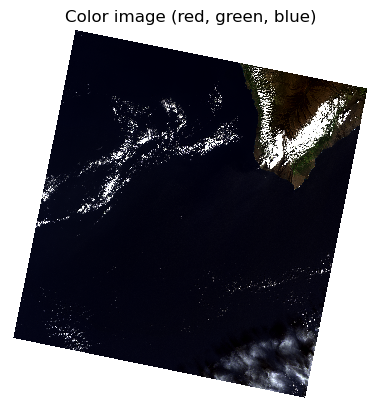

In [4]:
display_image()

>>> loading solar_zenith in radian
>>> loading blue in toa
>>> loading green in toa
>>> loading red in toa
>>> loading nir in toa
>>> loading swir1 in toa
>>> loading swir2 in toa
>>> loading tirs1 in bt
>>> loading cirrus in toa
>>> calculating hot
>>> calculating whiteness
>>> calculating ndvi
>>> calculating ndsi
>>> calculating ndbi
>>> loading dem from gtopo30
>>> loading gswo


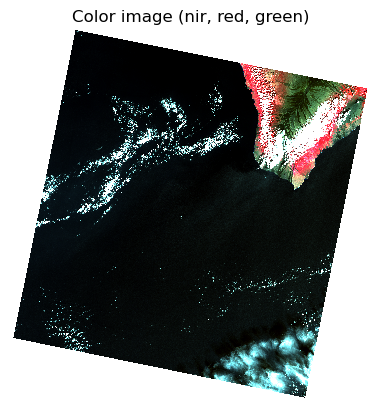

In [5]:
display_image(bands = ["nir", "red", "green"], percentiles = [5, 95])

>>> loading solar_zenith in radian
>>> loading blue in toa
>>> loading green in toa
>>> loading red in toa
>>> loading nir in toa
>>> loading swir1 in toa
>>> loading swir2 in toa
>>> loading tirs1 in bt
>>> loading cirrus in toa
>>> calculating hot
>>> calculating whiteness
>>> calculating ndvi
>>> calculating ndsi
>>> calculating ndbi
>>> loading dem from gtopo30
>>> loading gswo


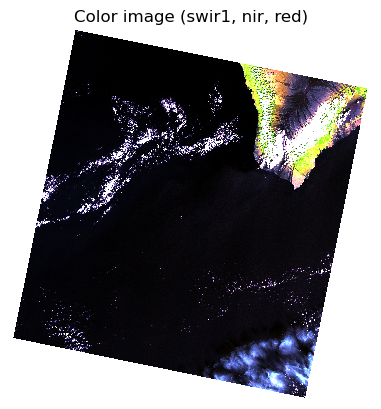

In [6]:
display_image(bands = ["swir1", "nir", "red"], percentiles = [5, 95])

>>> loading solar_zenith in radian
>>> loading blue in toa
>>> loading green in toa
>>> loading red in toa
>>> loading nir in toa
>>> loading swir1 in toa
>>> loading swir2 in toa
>>> loading tirs1 in bt
>>> loading cirrus in toa
>>> calculating hot
>>> calculating whiteness
>>> calculating ndvi
>>> calculating ndsi
>>> calculating ndbi
>>> loading dem from gtopo30
>>> loading gswo


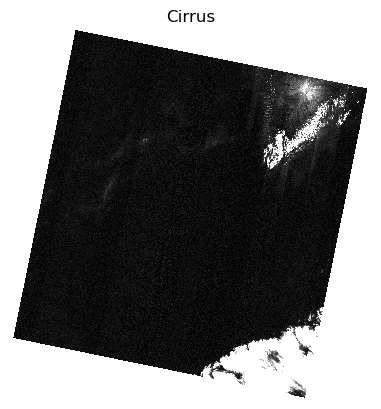

In [7]:
display_image(bands = ["cirrus", "cirrus", "cirrus"], title = 'Cirrus', percentiles = [5, 95])

>>> loading solar_zenith in radian
>>> loading blue in toa
>>> loading green in toa
>>> loading red in toa
>>> loading nir in toa
>>> loading swir1 in toa
>>> loading swir2 in toa
>>> loading tirs1 in bt
>>> loading cirrus in toa
>>> calculating hot
>>> calculating whiteness
>>> calculating ndvi
>>> calculating ndsi
>>> calculating ndbi
>>> loading dem from gtopo30
>>> loading gswo


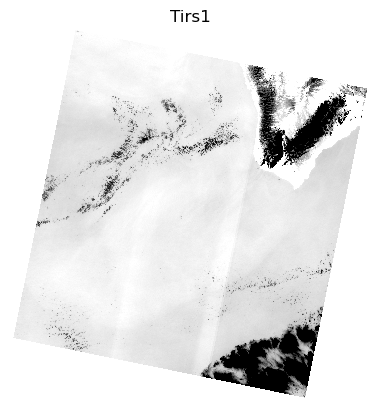

In [8]:
display_image(bands = ["tirs1", "tirs1", "tirs1"], title = 'Tirs1', percentiles = [5, 95])

In [9]:
from phylib import Physical, set_constants
set_constants()
phy = Physical(bands, woc=0.3, threshold=0.175, overlap=0.0)
phy.image = load_image()
resolution = 30  # spatial resolution that we processing the image
erosion_radius = int(90/resolution)  # the radius of erosion, unit: pixels
dilation_radius_unet = 100 # unit: pixels

if phy.activated is None:
    phy.init_cloud_probability()

del phy.image.data  # Warning: removes the band data (to free up space for comparison)

>>> loading solar_zenith in radian
>>> loading blue in toa
>>> loading green in toa
>>> loading red in toa
>>> loading nir in toa
>>> loading swir1 in toa
>>> loading swir2 in toa
>>> loading tirs1 in bt
>>> loading cirrus in toa
>>> calculating hot
>>> calculating whiteness
>>> calculating ndvi
>>> calculating ndsi
>>> calculating ndbi
>>> loading dem from gtopo30
>>> loading gswo


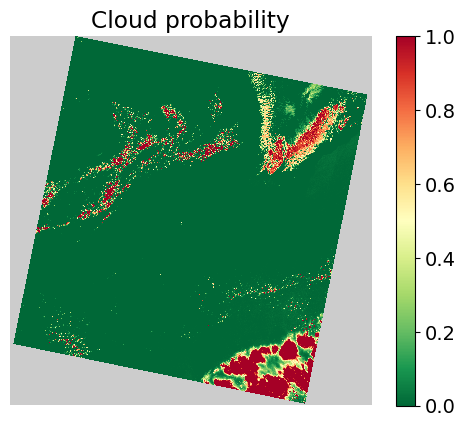

In [10]:
utils.show_cloud_probability(
    phy.prob_cloud,
    phy.image.filled,
    f"Cloud probability",
)

In [11]:
from phylib import Physical, set_constants
set_constants("constant_test")
phy2 = Physical(bands, woc=0.3, threshold=0.175, overlap=0.0)
phy2.image = load_image()
resolution = 30  # spatial resolution that we processing the image
erosion_radius = int(90/resolution)  # the radius of erosion, unit: pixels
dilation_radius_unet = 100 # unit: pixels

if phy2.activated is None:
    phy2.init_cloud_probability()

del phy2.image.data  # Warning: removes the band data (to free up space for comparison)

>>> loading solar_zenith in radian
>>> loading blue in toa
>>> loading green in toa
>>> loading red in toa
>>> loading nir in toa
>>> loading swir1 in toa
>>> loading swir2 in toa
>>> loading tirs1 in bt
>>> loading cirrus in toa
>>> calculating hot
>>> calculating whiteness
>>> calculating ndvi
>>> calculating ndsi
>>> calculating ndbi
>>> loading dem from gtopo30
>>> loading gswo


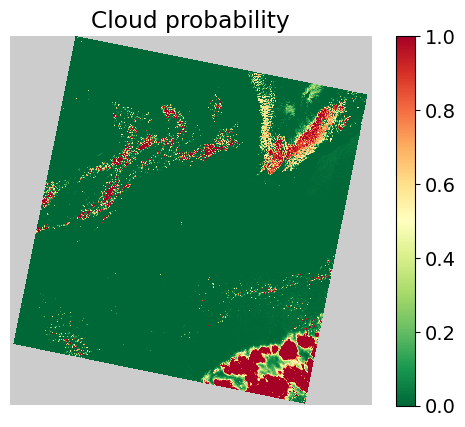

In [12]:
utils.show_cloud_probability(
    phy2.prob_cloud,
    phy2.image.filled,
    f"Cloud probability",
)

In [13]:
diff = phy2.prob_cloud - phy.prob_cloud

In [18]:
np.nanmean(diff)

np.float64(0.00016425190720589984)

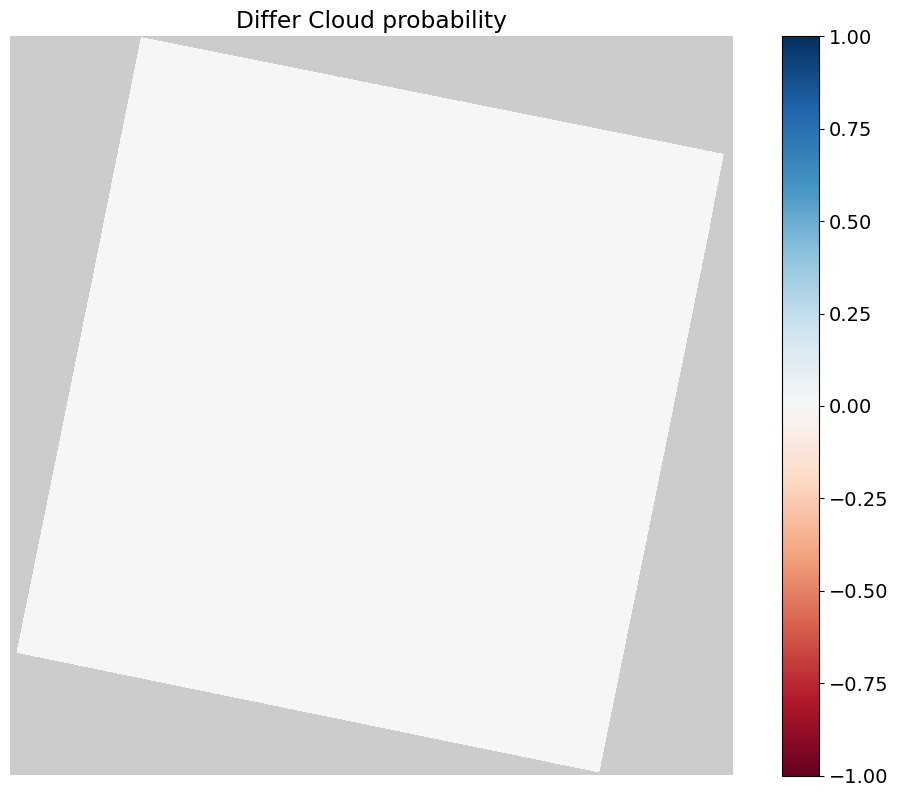

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
diff[phy.image.filled] = np.nan`
cm = mpl.colormaps.get_cmap("RdBu")
cm.set_bad(color="#cccccc")  # gray for filled
plt.rcParams.update({'font.size': 14, 'figure.figsize': (12.8, 9.6)}) # using a larger font size
c = plt.imshow(diff, vmin=-1, vmax=1, cmap=cm, interpolation="nearest")
plt.axis("off")
plt.title("Differ Cloud probability")
plt.colorbar(c)
plt.show()